In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
import zipfile  
import os 

In [2]:
!pip install prophet # Installing prophet

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [3]:
from statsmodels.tsa.arima.model import ARIMA # For time series forecasting with ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error  # For calculating prediction errors

In [4]:
# location of the ZIP file
file_path = r"C:\Users\tanzi\Personal Projects\Marketing-Campaign-Performance-Analysis\Marketing-Campaign-Performance-Analysis\data\campaign_summary.zip"

# Opening and laoding into dataframe
with zipfile.ZipFile(file_path, 'r') as z:
    with z.open('campaign_summary.csv') as f:
        df = pd.read_csv(f)

In [5]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_Days,Engagement_Ratio,CPC,CTR,Year-Month
0,1,Innovate Industries,Email,Men 18-24,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,30,0.263267,31.964427,0.263267,2021-01
1,2,NexGen Systems,Email,Women 35-44,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,60,0.015419,99.706897,0.015419,2021-01
2,3,Alpha Innovations,Influencer,Men 25-34,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,30,0.075864,17.465753,0.075864,2021-01
3,4,DataTech Solutions,Display,All Ages,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,60,0.119231,58.635945,0.119231,2021-01
4,5,NexGen Systems,Email,Men 25-34,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,15,0.090217,43.408971,0.090217,2021-01


In [6]:
# Converting 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Setitng 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

In [8]:
# Selecting 'ROI' for forecasting
df_roi = df[['ROI']]

In [9]:
# Resample the data by month for aggregation
df_roi_monthly = df_roi.resample('M').mean()

C:\Users\tanzi\AppData\Local\Temp\ipykernel_9912\2982784460.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_roi_monthly = df_roi.resample('M').mean()


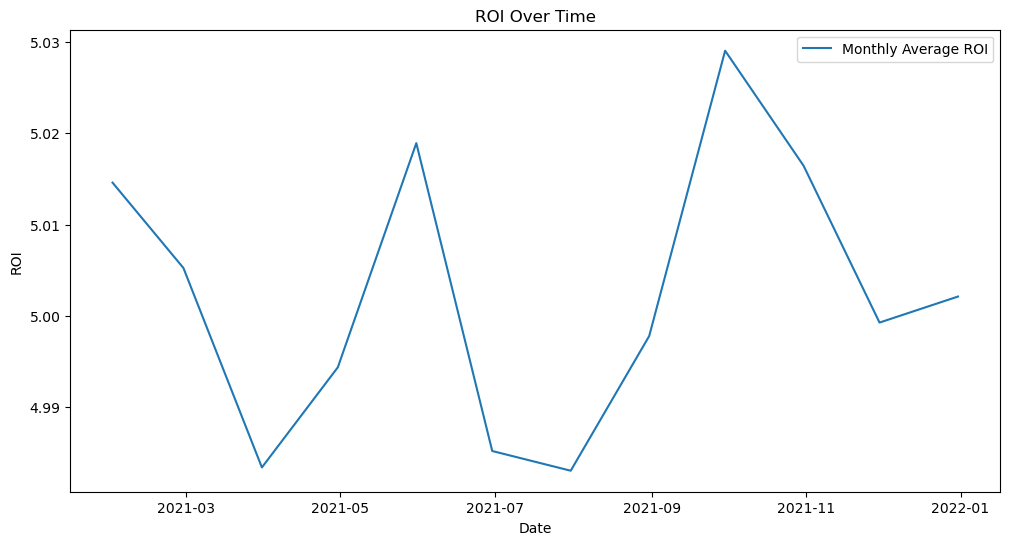

In [10]:
# Plotting ROI time series
plt.figure(figsize=(12,6))
plt.plot(df_roi_monthly, label="Monthly Average ROI")
plt.title("ROI Over Time")
plt.xlabel("Date")
plt.ylabel("ROI")
plt.legend()
plt.show()

In [11]:
# Fit an ARIMA model
model = ARIMA(df_roi_monthly, order=(5,1,0))
model_fit = model.fit()

In [12]:
# Make forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_9912\1922569912.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_roi_monthly.index[-1], periods=13, freq='M')[1:], forecast, label="Forecasted ROI", color='red')


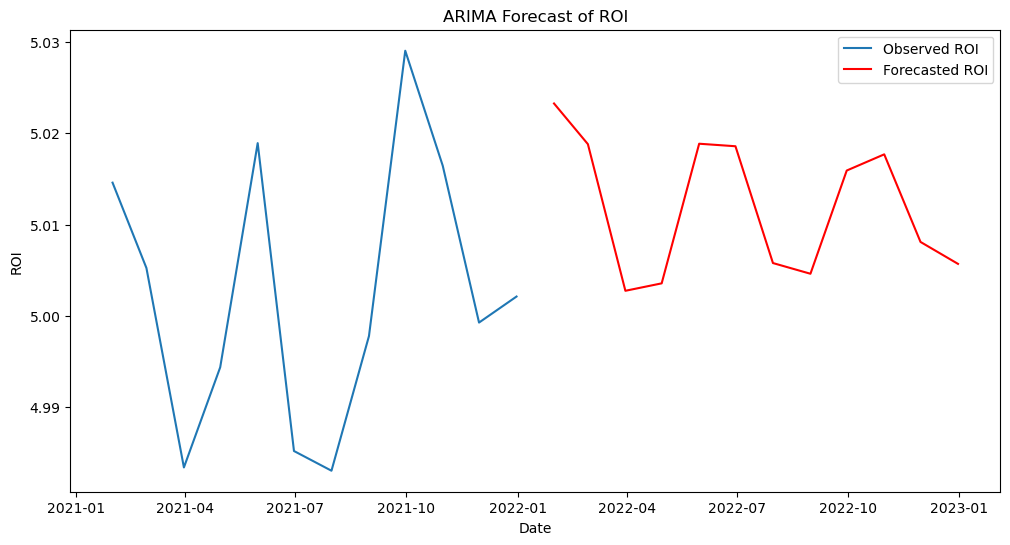

In [13]:
# Plotting the forecast for next 12 months
plt.figure(figsize=(12,6))
plt.plot(df_roi_monthly, label="Observed ROI")
plt.plot(pd.date_range(df_roi_monthly.index[-1], periods=13, freq='M')[1:], forecast, label="Forecasted ROI", color='red')
plt.title("ARIMA Forecast of ROI")
plt.xlabel("Date")
plt.ylabel("ROI")
plt.legend()
plt.show()